See `Machine_Learning_Part1.ipynb` for comments on the initial parts of the notebook.

In [1]:
from IPython.display import HTML # for producing html output in the notebook

import numpy as np # efficient number manipulation in Python

# Various libraries and settings necessary for plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as path_effects

fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Machine learning and data set generation
import sklearn as sk
from sklearn import datasets # for the moons and circles data sets
from sklearn import svm # SVM training
from sklearn.neural_network import MLPClassifier # ANNs with back-propogation
from sklearn import tree # Decision trees
import graphviz # visualising decision trees

In [2]:
def plot_data(ax, training, testing, clf = None, clf_type='sklearn'):
    (training_points, training_labels) = training
    (testing_points, testing_labels) = testing
    points = np.concatenate((training_points, testing_points))
    if clf is not None:
        min_x = np.min(np.transpose(points)[0]) - 0.5
        max_x = np.max(np.transpose(points)[0]) + 0.5
        min_y = np.min(np.transpose(points)[1]) - 0.5
        max_y = np.max(np.transpose(points)[1]) + 0.5
        xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.02),
                         np.arange(min_y, max_y, 0.02))
        
        if clf_type == 'sklearn':
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        elif clf_type == 'ann':
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        elif clf_type == 'keras':
            Z = clf.predict_on_batch(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        
    ax.scatter(x = np.transpose(training_points)[0],
               y = np.transpose(training_points)[1],
               c=training_labels, cmap=cm_bright)
    ax.scatter(x = np.transpose(testing_points)[0],
               y = np.transpose(testing_points)[1],
               c=testing_labels, alpha=0.3, cmap=cm_bright)
    
    if clf is not None:
        score = 0
        
        if clf_type == 'sklearn' or clf_type == 'ann':
            score = clf.score(testing_points, testing_labels)
            
        ax.text(xx.max() - 0.2, yy.min() + 0.2, ('{0:.2f}'.format(score)),
           size=34, horizontalalignment='right', color='white', 
                path_effects=[path_effects.Stroke(linewidth=1, foreground='black')])

In [3]:
(points, labels) = datasets.make_moons(n_samples = 150)
training_moon_p = points[0:100:1]; training_moon_l = labels[0:100:1]
testing_moon_p = points[100:150:1]; testing_moon_l = labels[100:150:1]

In [4]:
(points, labels) = datasets.make_circles(n_samples = 250, shuffle=True, noise=None)
training_circ_p = points[0:150:1]; training_circ_l = labels[0:150:1]
testing_circ_p = points[150:250:1]; testing_circ_l = labels[150:250:1]

In [5]:
def load_spirals():
    data = np.loadtxt('data/two-spirals.csv', delimiter=',')
    
    # shuffle the data set (so that training and testing are not "in order")
    # with a reproducable random seed
    np.random.seed(12345) 
    np.random.shuffle(data)
    
    points = np.transpose(np.array((np.transpose(data)[0], np.transpose(data)[1])))
    labels = np.transpose(data)[2]
    return (points, labels)

In [6]:
(points, labels) = load_spirals()
training_spir_p = points[0:120:1]; training_spir_l = labels[0:120:1]
testing_spir_p = points[120:194:1]; testing_spir_l = labels[120:194:1]

# Neural Networks

![An example of an ANN](img/ann.png "Image from Wikipedia")

Each node evaluates a dot product of input $x$ with a vector of weights $w$ (plus a bias $b$), which is then fed into an *activation function* $\varphi()$

$$y = \varphi(<x, w> + b)$$

In [7]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 12), random_state=12345)
clf.fit(training_moon_p, training_moon_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_moon_p, testing_moon_l)) + '</h3>')

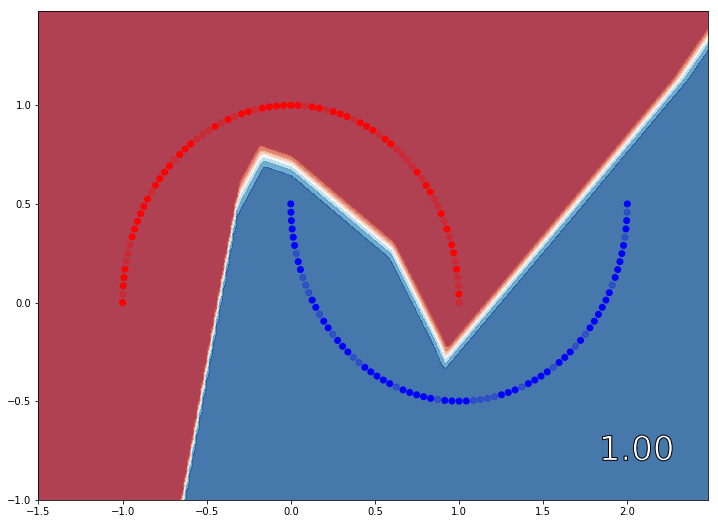

In [8]:
fig, ax = plt.subplots()
plot_data(ax, (training_moon_p, training_moon_l),
          (testing_moon_p, testing_moon_l), clf, 'ann')

In [9]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 15), random_state=12345)
clf.fit(training_circ_p, training_circ_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_circ_p, testing_circ_l)) + '</h3>')

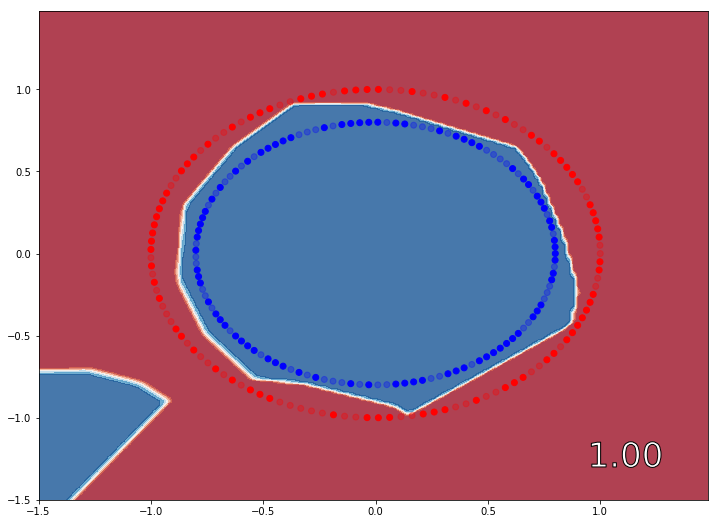

In [10]:
fig, ax = plt.subplots()
plot_data(ax, (training_circ_p, training_circ_l),
          (testing_circ_p, testing_circ_l), clf, 'ann')

In [11]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 15), random_state=12345)
clf.fit(training_spir_p, training_spir_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_spir_p, testing_spir_l)) + '</h3>')

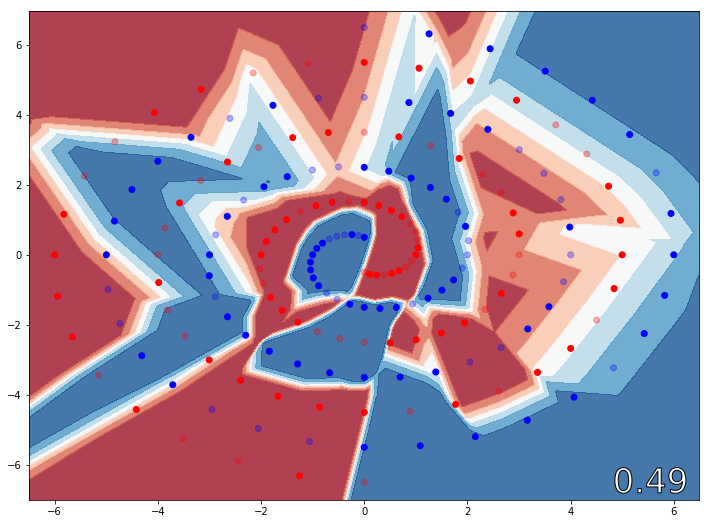

In [12]:
fig, ax = plt.subplots()
plot_data(ax, (training_spir_p, training_spir_l),
          (testing_spir_p, testing_spir_l), clf, 'ann')

In [13]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,15), random_state=12345)
clf.fit(points, labels)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_spir_p, testing_spir_l)) + '</h3>')

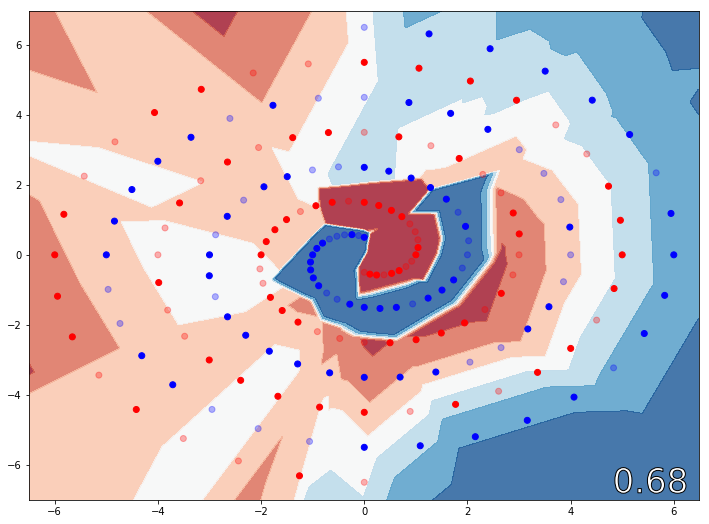

In [14]:
fig, ax = plt.subplots()
plot_data(ax, (training_spir_p, training_spir_l),
             (testing_spir_p, testing_spir_l), clf, 'ann')

In [15]:
np.random.seed(4375689)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

train_X = points
train_y = labels

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, batch_size=32, epochs=4000, verbose=0)

score = model.evaluate(train_X, train_y, verbose=0)

Using TensorFlow backend.


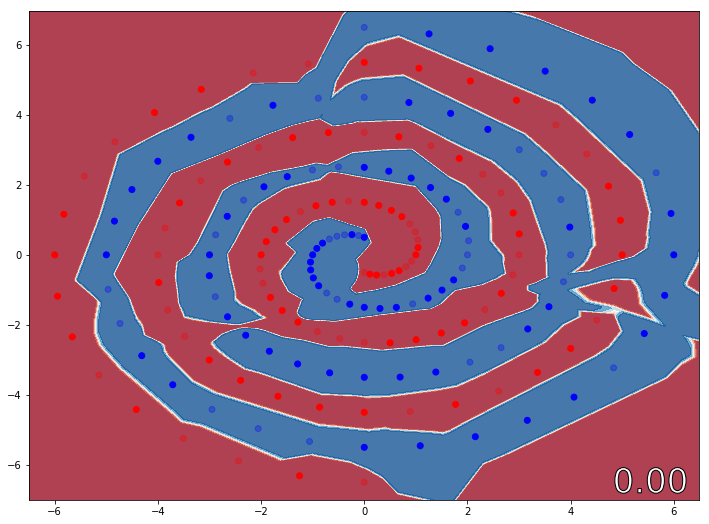

In [16]:
fig, ax = plt.subplots()
plot_data(ax, (training_spir_p, training_spir_l),
             (testing_spir_p, testing_spir_l), model, 'keras')

# Results summary

In [17]:
def summary_ann():
    fig, axes = plt.subplots(2,3)

    fig.set_figwidth(14)

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[0,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf)
    axes[0,1].set_title("Radial-basis SVM, circles")

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[0,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf)
    axes[0,0].set_title("Radial-basis SVM, moons")

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[0,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf)
    axes[0,2].set_title("Radial-basis SVM, spirals")
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 12), random_state=12345)    
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[1,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf, 'ann')
    axes[1,0].set_title("ANN, moons")
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
            hidden_layer_sizes=(15, 15), random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[1,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf, 'ann')
    axes[1,1].set_title("ANN, circles")

    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 15), random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[1,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf, 'ann')
    axes[1,2].set_title("ANN, spirals")
    
    for ax1 in axes:
        for ax in ax1:
            ax.set_xticks(())
            ax.set_yticks(())

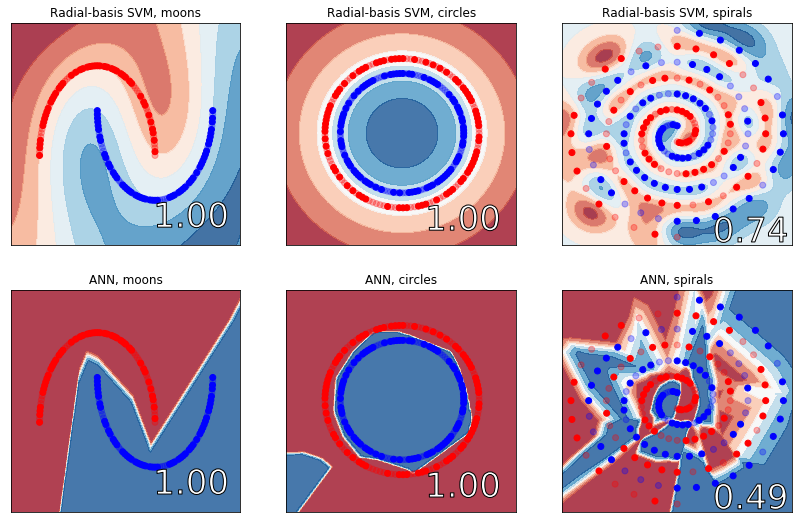

In [18]:
summary_ann()